In [1]:
import pandas as pd
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_X = pd.read_csv('http://cs229.stanford.edu/ps/ps1/logistic_x.txt', sep='\ +', header=None, engine='python')
ys = pd.read_csv('http://cs229.stanford.edu/ps/ps1/logistic_y.txt', sep='\ +', header=None, engine='python')

ys = ys.astype(int)
print(df_X[:5],111,ys[:5])


          0         1
0  1.343250 -1.331148
1  1.820553 -0.634668
2  0.986321 -1.888576
3  1.944373 -1.635452
4  0.976734 -1.353315 111    0
0 -1
1 -1
2 -1
3 -1
4 -1


In [3]:
df_X['label'] = ys[0].values

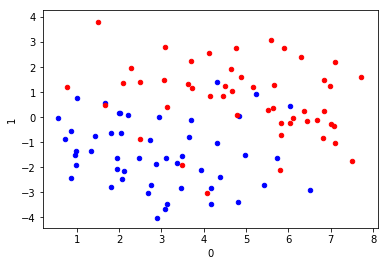

In [4]:
ax = plt.axes()
df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

In [5]:
def sigmoid(x):
    return 1/(1+exp(-x))

In [6]:
#需要解决的问题包括：
#1、如何将pandas中的数据提出

In [7]:
Xs = df_X[[0, 1]].values

In [21]:
#注意有 theta * X 种有常数项，因此需要补齐 1 ，利用np.hstack
#需要转为矩阵形式
X_train = mat(hstack((ones((Xs.shape[0],1)),Xs)))
Y_train = mat(ys)
m,n= X_train.shape
weights= zeros((n,1))
print(Y_train,len(Y_train))

[[-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]] 99


c:\users\wuyongqi\desktop\flask_practice\flasky\.venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
c:\users\wuyongqi\desktop\flask_practice\flasky\.venv\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


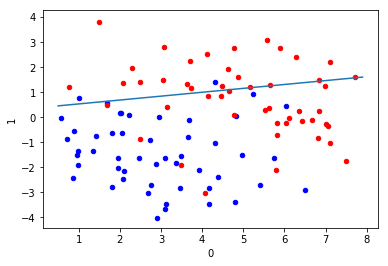

In [22]:
#采用全局训练的办法
maxstep = 20000 

for i in range(maxstep):
    alpha = 50/(i+1) + 0.001
    h = sigmoid(X_train * weights)
    errors = Y_train - h
    weights = weights + alpha* X_train.transpose()*errors
#训练结束，画出训练结果
x = arange(0.5,8,0.1)
weights = weights.getA()
y = -(weights[0]+weights[1]*x)/weights[2]
plt.plot(x,y)
ax = plt.axes()
df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

In [179]:
#采用牛顿下降法处理
all_thetas = [] # collect for demonstration purpose
theta = np.zeros(X_train.shape[1])
tol = 1e9
n_iters = 0
ys = df_X['label'].values
print(theta.shape,ys.shape,X_train.shape)
#X_train=X_train.getA()
while tol > 1e-6:
    zs = ys * X_train.dot(theta)
    #zs = ys * Xs.dot(theta)
    gzs = 1 / (1 + np.exp(-zs))
    #注意区别向量乘法与矩阵乘法
    nabla = np.mean((gzs - 1) * ys * Xs.T, axis=1)
    
    # Refactor, more efficient way of calculating hessian
    hessian = np.zeros((X_train.shape[1], X_train.shape[1]))
    for i in range(hessian.shape[0]):
        for j in range(hessian.shape[0]):
            if i <= j:
                hessian[i][j] = np.mean(gzs * (1 - gzs) * X_train[:,i] * X_train[:,j])
                if i != j:
                    hessian[j][i] = hessian[i][j]
            
    delta = np.linalg.inv(hessian).dot(nabla)
    old_theta = theta.copy()
    theta -= delta
    all_thetas.append(theta.copy())
    n_iters += 1
    tol = np.sum(np.abs(theta - old_theta))
print('converged after {0} iterations'.format(n_iters))

(3,) (99,) (99, 3)


ValueError: shapes (3,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

In [164]:
a=np.mat([[1],[2],[3]])

array([1, 4, 9])

In [ ]:
#采用矩阵的方式处理
